In [2]:
# -*- coding: utf-8 -*-
import random
import time
from threading import Thread
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import sys
import copy

from sort_functions import *

# Hybrid sort

In [3]:
def sort_hybrid(A, threshold = 100, hybrid_sort = False):
    time_start = time.time()
    quick_sort_mod(A, 0, len(A)-1, threshold, hybrid_sort)
    return (time.time() - time_start)
    

In [4]:
def quick_sort_mod(A, low, hi, threshold, hybrid_sort):
    
    if hi-low < threshold and low < hi and hybrid_sort:
        insertion_sort(A, low, hi)
    elif low < hi:
        p = partition(A, low, hi)
        quick_sort_mod(A, low, p - 1, threshold, hybrid_sort)
        quick_sort_mod(A, p + 1, hi, threshold, hybrid_sort)
        

#### To find the best solution (threshold) we'll use the special function below. The function finds working time of the both clear and hybrid function and then it'll save to the file "thresholds.npy" in the next format: 
    [...[threshold, times_hybr, times_clear]....]

In [7]:
def analyze_threshold(random_array = False, btn_threshold_line = 2, top_threshold_line = 5, num_arrays = 10):
    
    if random_array:
        data = np.random.randint(0, 1000000, (num_arrays, 100000))
    else:
        data = np.load("data.npy")
    data = data.tolist() 
    res = []
    
    for trd in range(btn_threshold_line, top_threshold_line):
        print("threshold: ", trd)
    
        times_hybr = []
        times_clear = []
        
        A = copy.deepcopy(data)
        B = copy.deepcopy(data)
        for i in range(len(data)):
            times_hybr.append(sort_hybrid(A[i], threshold = trd, hybrid_sort = True))
            times_clear.append(sort_hybrid(B[i], hybrid_sort = False))

        res.append([trd, np.array(times_hybr).mean(), np.array(times_clear).mean()])
#     plt.plot(np.arange(len(A[0])), A[0])
    res = np.array(res)
    np.save("data.npy", data)
    np.save("thresholds.npy", res)

In [ ]:
# It's not for launching (all the necessary files exist)!!!

analyze_threshold(random_array=False, btn_threshold_line=4, top_threshold_line=100, num_arrays=20)

# Analysis

## Paralel sort (bad)
#### Now we'll finding the best thresholds

In [39]:
#ooo = [...[threshold, times_hybr, times_clear]....]
ooo = np.load("thresholds.npy")
ooo.shape

(96, 3)

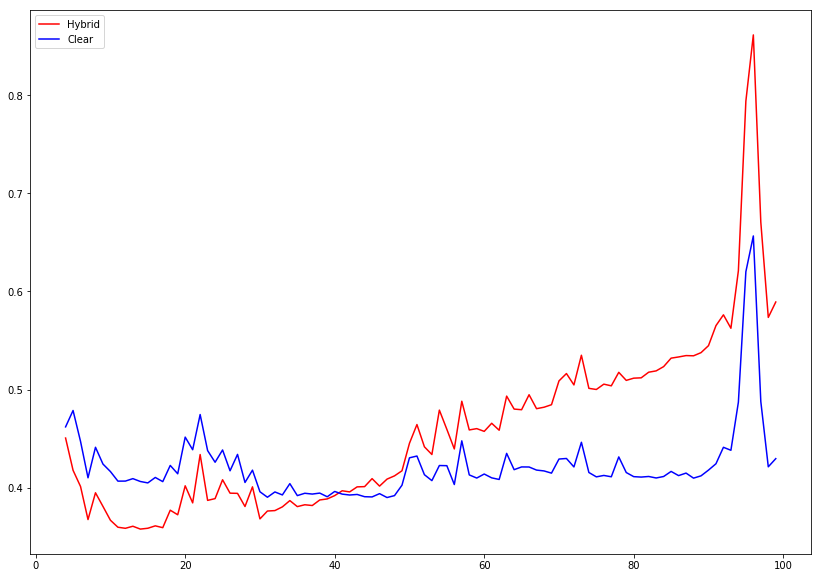

In [8]:
fig, ax = plt.subplots(figsize=(14, 10))


ax.plot(ooo[:, 0], ooo[:,1], c='r', label = "Hybrid")
ax.plot(ooo[:, 0], ooo[:,2], c='b', label = "Clear")
ax.legend()
plt.show()

In [40]:
#ooo = [...[threshold, times_hybr, times_clear]....]
# time of the clear algorithm - time of the hybrid algorithm
diffetence = ooo[:,2] - ooo[:,1]
diffetence.shape

(96,)

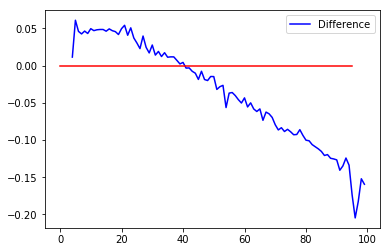

In [72]:
plt.plot(ooo[:, 0], diffetence, c='b', label = "Difference")
plt.plot(np.arange(len(ooo)), [0]*len(ooo), c='r')
plt.legend()

In [20]:
print("The best threshold: {}".format( ooo[np.argmax(diffetence)][0] ))

The best threshold: 5.0


#### Well, now we have got some result but it can be the ejection actually. So we need to find other solutions.

#We have chanced the merge sort. So it can sort not arrays only and matrix also

In [83]:
def merge_sort(A, axes=0):
    merge_sort2(A, 0, len(A)-1, axes)

def merge_sort2(A, first, last, axes):
    if first < last:
        middle = (first + last)//2
        merge_sort2(A, first, middle, axes)
        merge_sort2(A, middle+1, last, axes)
        merge(A, first, middle, last, axes)

def merge(A, first, middle, last, axes):
    L = A[first:middle+1]
    R = A[middle+1:last+1]
    L.append([sys.maxsize]*(axes+1))
    R.append([sys.maxsize]*(axes+1))
    i = j = 0
    for k in range (first, last+1):
        if L[i][axes] <= R[j][axes]:
            A[k] = L[i]
            i += 1
        else:
            A[k] = R[j]
            j += 1

In [78]:
# To do the parallel calculations we need to do concatenate our data frames:
Mass = np.column_stack((ooo, diffetence))
Mass = Mass.tolist()

#Mass has the next shape: (n,4)

In [86]:
merge_sort(Mass, axes=3)
Mass = np.array(Mass)

#### Selecte the best 10 resoults:

In [99]:
best_thresholds = Mass[-10:,[0,-1]]

In [100]:
best_thresholds

array([[11.        ,  0.0469497 ],
       [12.        ,  0.04809026],
       [13.        ,  0.04848799],
       [14.        ,  0.04849441],
       [16.        ,  0.04929515],
       [10.        ,  0.04959124],
       [20.        ,  0.04959502],
       [23.        ,  0.05069386],
       [21.        ,  0.05414375],
       [ 5.        ,  0.06091579]])

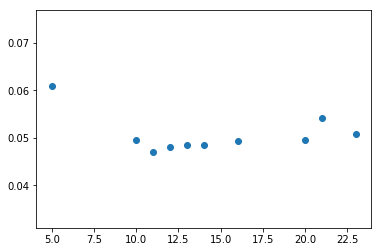

In [101]:
plt.scatter(best_thresholds[:, 0], best_thresholds[:, 1])

### Now we can see that "best point